<p align="center">
    <img src="Image1.png" width="1000"
</p>

# Randomized Algorithms and Concentration Inequalities
**Course:** Quantum Machine Learning  
**Name:** Francisco Argüello

## Objectives
1. Generate random samples and compare for the following distributions: a)Normal (different valuesof variance and mean), b) Uniform, c) Beta.
2. Estimate and compare the confidence intervals, or error bars, obtained using **Hoeffding's inequality** and **Chebyshev inequality**.
3. Compare results to theoretical values.
4. Evaluate which distribution satisfy the **68-95-99.7 empirical rule**


## 1. Probability Distributions


### 1.1 Normal Distribution Comparison

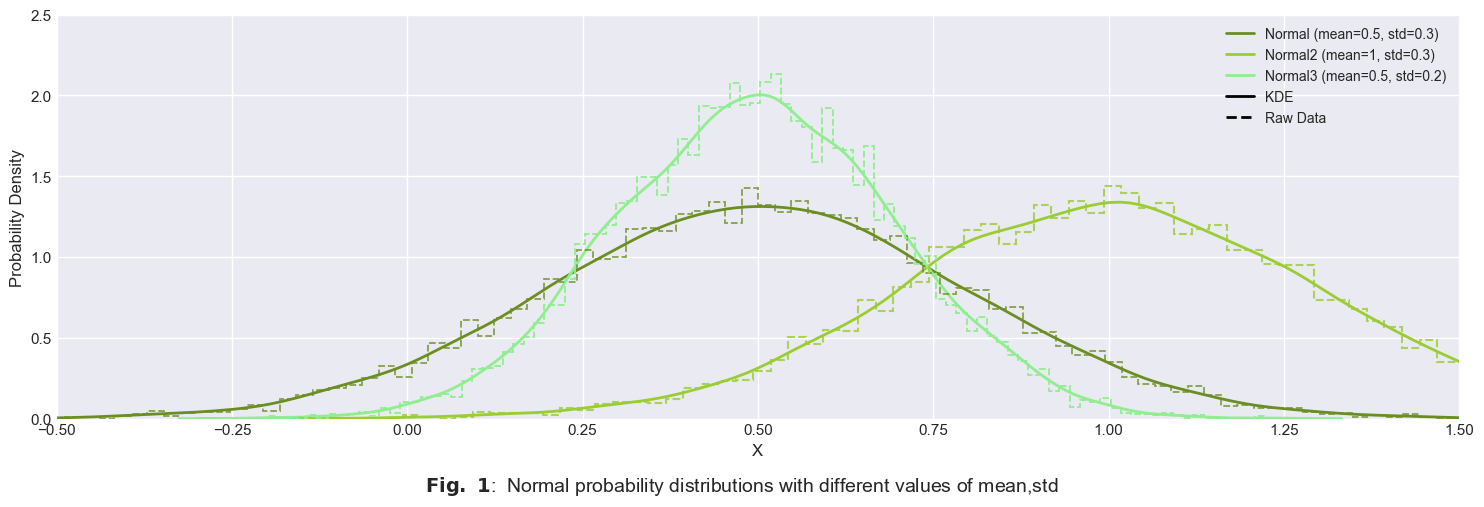

In [160]:
#Libraries 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

#General Configuration
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (15,5)
plt.rcParams['figure.dpi'] = 100

#Variables
n_samples = 10000
#Normal distribution
nor_mean = 0.5
nor_sigma = 0.3
nor2_mean = 1
nor2_sigma = 0.3
nor3_mean = 0.5
nor3_sigma = 0.2

#Random samples generation for each distribution
np.random.seed(42)
nor_samples=np.random.normal(loc=nor_mean,scale=nor_sigma,size=n_samples)
nor2_samples=np.random.normal(loc=nor2_mean,scale=nor2_sigma,size=n_samples)
nor3_samples=np.random.normal(loc=nor3_mean,scale=nor3_sigma,size=n_samples)

#Plot Data KDE
plt.figure()
sns.kdeplot(nor_samples, color='olivedrab', linewidth=2, label=f'Normal (mean={nor_mean}, std={nor_sigma})')
sns.kdeplot(nor2_samples, color='yellowgreen', linewidth=2, label=f'Normal2 (mean={nor2_mean}, std={nor2_sigma})')
sns.kdeplot(nor3_samples, color='lightgreen', linewidth=2, label=f'Normal3 (mean={nor3_mean}, std={nor3_sigma})')

#Plot Step Histogram
plt.hist(nor_samples, bins=100, density=True,histtype='step',linestyle='--', linewidth=1.3, color='olivedrab', alpha=0.8)
plt.hist(nor2_samples, bins=100, density=True,histtype='step',linestyle='--', linewidth=1.5, color='yellowgreen', alpha=0.8)
plt.hist(nor3_samples, bins=100, density=True,histtype='step',linestyle='--', linewidth=1.3, color='lightgreen', alpha=1)

#Plot Settings
plt.figtext(0.5,0.0001,r"$\mathbf{Fig.\ 1}$:  Normal probability distributions with different values of mean,std",ha="center", fontsize=14)
plt.xlabel('X',fontsize=12)
plt.ylabel('Probability Density', fontsize=12)

handles, labels = plt.gca().get_legend_handles_labels()
line_kde = Line2D([0], [0], color='black', linestyle='-', linewidth=2, label='KDE')
line_raw = Line2D([0], [0], color='black', linestyle='--', linewidth=2, label='Raw Data')
handles.extend([line_kde, line_raw])
plt.legend(handles=handles, fontsize=10, loc='upper right')

plt.xlim(-0.5,1.5)
plt.ylim(0,2.5)
plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.show()


<div style="width: 90%; margin: 0 auto;">
<p style="text-align: justify;">
<b>Figure 1</b> shows three normal probability distributions. The simulation data for all distributions were obtained using the function <i>random.normal</i> from the NumPy library. A total of 10,000 elements were defined as the sample size for each distribution in order to have well-define graphs. The plot of all sets was made using the function <i>hist</i> to show the raw data with a dashed line, and <i>kdeplot</i> (KDE) to show smooth curves with a continuous line. The range of X values was adjusted to make the curves comparable to the distribution shown in <b>Figure 2</b>.  <br>
</p>
<p style="text-align: justify;">
Two parameters must be defined first to generate the data points: the mean value and the standard deviation. To compare how changing these parameters affects the outcomes, two combinations were tested in the code. The first one corresponds to <i>Normal</i> and <i>Normal2</i>, where the standard deviation was kept constant adn equal to <b>0.3 (variance = 0.09)</b> but the <b>mean value</b> was changed from <b>0.5</b> to <b>1</b>. This caused a shift to the right, but the shape of the curve did not change. In contrast, for <i>Normal</i> and <i>Normal3</i>, the mean value was kept constant while the standard deviation was changed from <b>0.3 to 0.2 (variance = 0.04)</b>, causing the shape of the curve to become thinner and higher, as expected considering that the total area under the curve must remain constant and equal to one. In general, it is possible to say that changing the mean value shifts the curve, and changing the standard deviation alters its shape. 
</p>
</div>

## 1.2 Normal, Uniform, and Beta Distributions Comparison

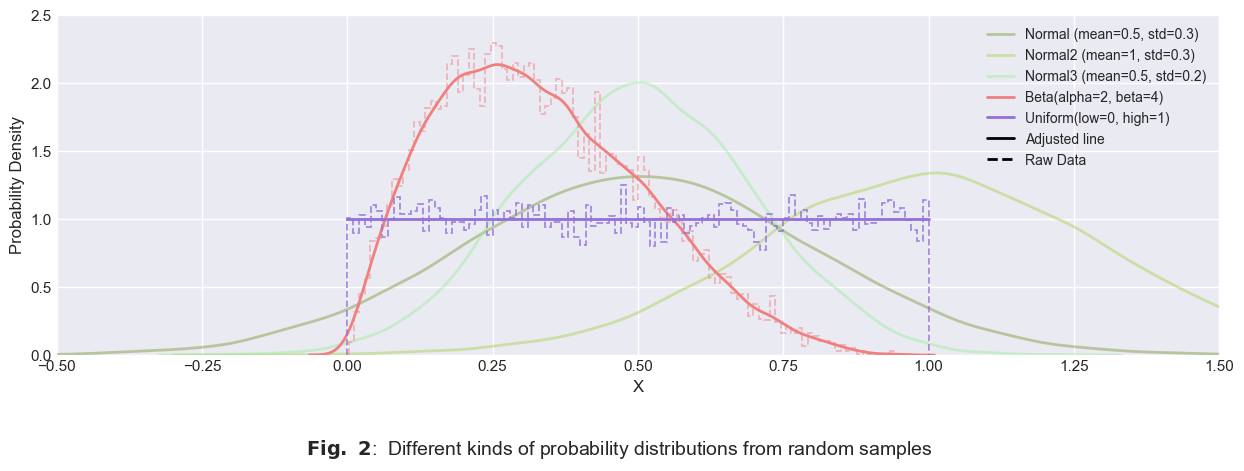

In [189]:
#Libraries 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#General Configuration
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (15,5)
plt.rcParams['figure.dpi'] = 100

#Variables
n_samples = 10000
#Normal distribution
nor_mean = 0.5
nor_sigma = 0.3
nor2_mean = 1
nor2_sigma = 0.3
nor3_mean = 0.5
nor3_sigma = 0.2
#Uniform distribution
uni_low=0
uni_high=1
#Beta Distribution
bet_alpha=2
bet_beta=4

#Random samples generation for each distribution
np.random.seed(42)
nor_samples=np.random.normal(loc=nor_mean,scale=nor_sigma,size=n_samples)
nor2_samples=np.random.normal(loc=nor2_mean,scale=nor2_sigma,size=n_samples)
nor3_samples=np.random.normal(loc=nor3_mean,scale=nor3_sigma,size=n_samples)
uni_samples=np.random.uniform(low=uni_low, high=uni_high, size=n_samples)
bet_samples=np.random.beta(a=bet_alpha, b=bet_beta, size=n_samples)


#Plot Data
plt.figure()
sns.kdeplot(nor_samples, color='olivedrab', linewidth=2, alpha=0.4, label=f'Normal (mean={nor_mean}, std={nor_sigma})')
sns.kdeplot(nor2_samples, color='yellowgreen', linewidth=2,alpha=0.4, label=f'Normal2 (mean={nor2_mean}, std={nor2_sigma})')
sns.kdeplot(nor3_samples, color='lightgreen', linewidth=2,alpha=0.4, label=f'Normal3 (mean={nor3_mean}, std={nor3_sigma})')
sns.kdeplot(bet_samples, color='lightcoral', linewidth=2,bw_adjust=0.8,label=f'Beta(alpha={bet_alpha}, beta={bet_beta})')
plt.plot([uni_low,uni_high],[1.0,1.0],color='mediumpurple',linewidth=2, label=f'Uniform(low={uni_low}, high={uni_high})')

#Plot Step Histogram
plt.hist(uni_samples, bins=100, density=True,histtype='step',linestyle='--', linewidth=1.3, color='mediumpurple', alpha=0.8)
plt.hist(bet_samples, bins=100, density=True,histtype='step',linestyle='--', linewidth=1.3, color='lightcoral', alpha=0.5)

#Plot Settings
plt.figtext(0.5,0.0001,r"$\mathbf{Fig.\ 2}$:  Different kinds of probability distributions from random samples",ha="center", fontsize=14)
plt.xlabel('X',fontsize=12)
plt.ylabel('Probability Density', fontsize=12)

handles, labels = plt.gca().get_legend_handles_labels()
line_kde = Line2D([0], [0], color='black', linestyle='-', linewidth=2, label='Adjusted line')
line_raw = Line2D([0], [0], color='black', linestyle='--', linewidth=2, label='Raw Data')
handles.extend([line_kde, line_raw])
plt.legend(handles=handles, fontsize=10, loc='upper right')

plt.xlim(-0.5,1.5)
plt.ylim(0,2.5)
plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.show()


<div style="width: 90%; margin: 0 auto;">
<p style="text-align: justify;">
In <b>Figure 2</b>, examples of Beta and Uniform probability distributions have been added to the previous analysis. The sample size and the procedure were the same as previously presented in <b>Figure 1</b>. However, the fitting curve for the <b>Uniform distribution</b> was obtained differently, by constructing a plot function using theoretical values. More specifically, to generate the samples, two parameters had to be defined: the highest and lowest limits, which were set to <b>high=1</b> and <b>low=0</b>, respectively. In addition to these limits, the condition that the total area must equal one completely defines the height and shape of the curve. The use of a KDE plot was not suitable in this case because it distorts the sharp boundaries; therefore, the theoretical behavior was used to construct the fitting line over the raw data. As observed, this kind of distribution is symmetric about the mean value and presents a constant probability, appearing essentially structureless compared to the Normal and Beta distributions. <br> 
 </p>   
<p style="text-align: justify;">   
Regarding the <b>Beta distribution</b>, two parameters, <b>alpha</b> (a) and <b>beta</b> (b), were needed to generate the samples, and a KDE plot was used to smooth the raw data curve. Unlike the Normal distribution, which is always symmetric, the Beta curve can be asymmetric about the mean as in the case, <b>a=2</b> and <b>b=4</b>, where the probability is concentrated on the left side as a consequence of using a parameter b larger than a. However, symmetry can be achieved if <b>a=b</b> and <b>a,b>1</b> as in the case <b>a=b=2</b> shown in <b>figure 3</b>. Furthermore, if we set <b>a=b=1</b>, we obtain an approximation of a Uniform distribution.<br>
</p>

<p style="text-align: justify;">
We can conclude that, compared to the Normal and Uniform, the most flexible distribution corresponds to the Beta distribution. It can generate asymmetric or symmetric curves, or approximate a uniform distribution.
</p>
</div>

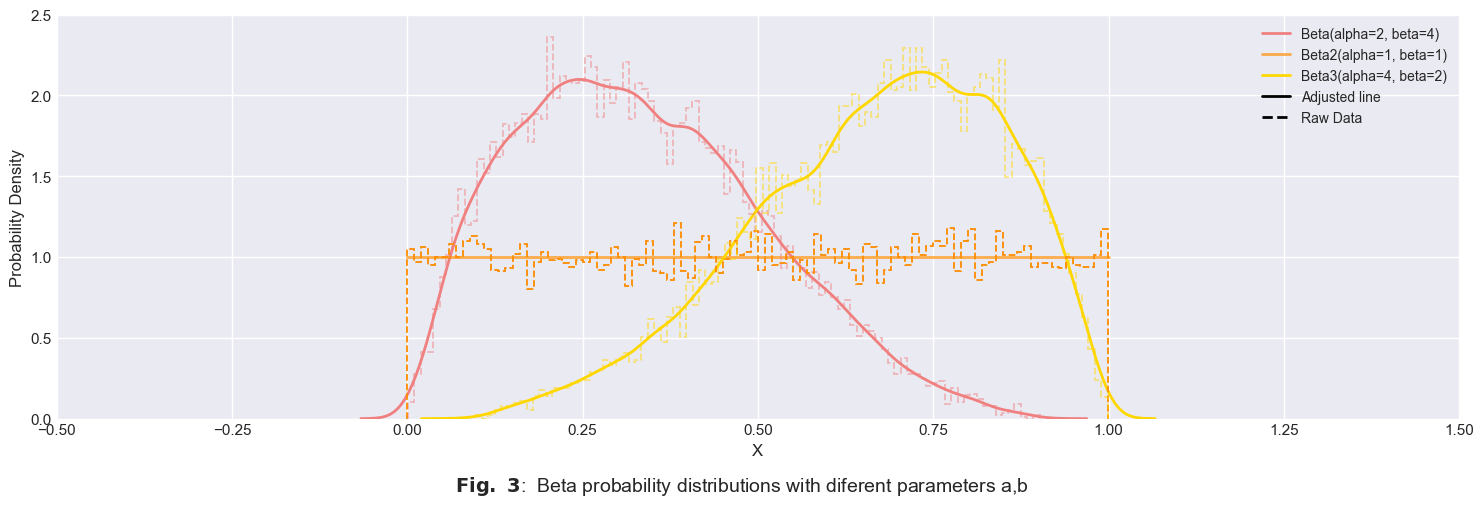

In [162]:
#Libraries 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#General Configuration
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (15,5)
plt.rcParams['figure.dpi'] = 100

#Variables
n_samples = 10000

#Beta Distribution
bet_alpha=2
bet_beta=4
bet2_alpha=1
bet2_beta=1
bet3_alpha=4
bet3_beta=2

#Random samples generation for each distribution
np.random.seed(42)
bet_samples=np.random.beta(a=bet_alpha, b=bet_beta, size=n_samples)
bet2_samples=np.random.beta(a=bet2_alpha, b=bet2_beta, size=n_samples)
bet3_samples=np.random.beta(a=bet3_alpha, b=bet3_beta, size=n_samples)


#Plot Data
plt.figure()


sns.kdeplot(bet_samples, color='lightcoral', linewidth=2,bw_adjust=0.8,label=f'Beta(alpha={bet_alpha}, beta={bet_beta})')
plt.plot([uni_low,uni_high],[1.0,1.0],color='darkorange',linewidth=2,alpha=0.7, label=f'Beta2(alpha={bet2_alpha}, beta={bet2_beta})')
sns.kdeplot(bet3_samples, color='gold', linewidth=2,bw_adjust=0.8,label=f'Beta3(alpha={bet3_alpha}, beta={bet3_beta})')


#Plot Step Histogram

plt.hist(bet_samples, bins=100, density=True,histtype='step',linestyle='--', linewidth=1.3, color='lightcoral', alpha=0.5)
plt.hist(bet2_samples, bins=100, density=True,histtype='step',linestyle='--', linewidth=1.3, color='darkorange', alpha=1)
plt.hist(bet3_samples, bins=100, density=True,histtype='step',linestyle='--', linewidth=1.3, color='gold', alpha=0.5)

#Plot Settings
plt.figtext(0.5,0.0001,r"$\mathbf{Fig.\ 3}$:  Beta probability distributions with diferent parameters a,b",ha="center", fontsize=14)
plt.xlabel('X',fontsize=12)
plt.ylabel('Probability Density', fontsize=12)

handles, labels = plt.gca().get_legend_handles_labels()
line_kde = Line2D([0], [0], color='black', linestyle='-', linewidth=2, label='Adjusted line')
line_raw = Line2D([0], [0], color='black', linestyle='--', linewidth=2, label='Raw Data')
handles.extend([line_kde, line_raw])
plt.legend(handles=handles, fontsize=10, loc='upper right')

plt.xlim(-0.5,1.5)
plt.ylim(0,2.5)
plt.tight_layout(rect=[0, 0.03, 1, 1])
plt.show()


## 2. Confidence intervals Analysys

### 2.1 Chebyshev's Inequality

<div style="width: 90%; margin: 0 auto;">
<p style="text-align: justify;">
    
For any random variable $X$ with finite mean and for *any* $\epsilon > 0$, the expresion of Chebyshev Inequality is[1]:

$$
P(|\overline{X} - \mu| \geq \epsilon) \leq \frac{\sigma^2}{N\epsilon^2}
$$
Considering $\alpha=1-CL$, where CL is the confidence level (e.g 95%), we can write:

$$\alpha =\frac{\sigma^2}{N\epsilon^2} $$

Solving for the error bound $\epsilon$:

$$\epsilon = \sqrt{\frac{\sigma^2}{\alpha N}} = \frac{\sigma} {\sqrt{\alpha N}}$$

</p>
</div>


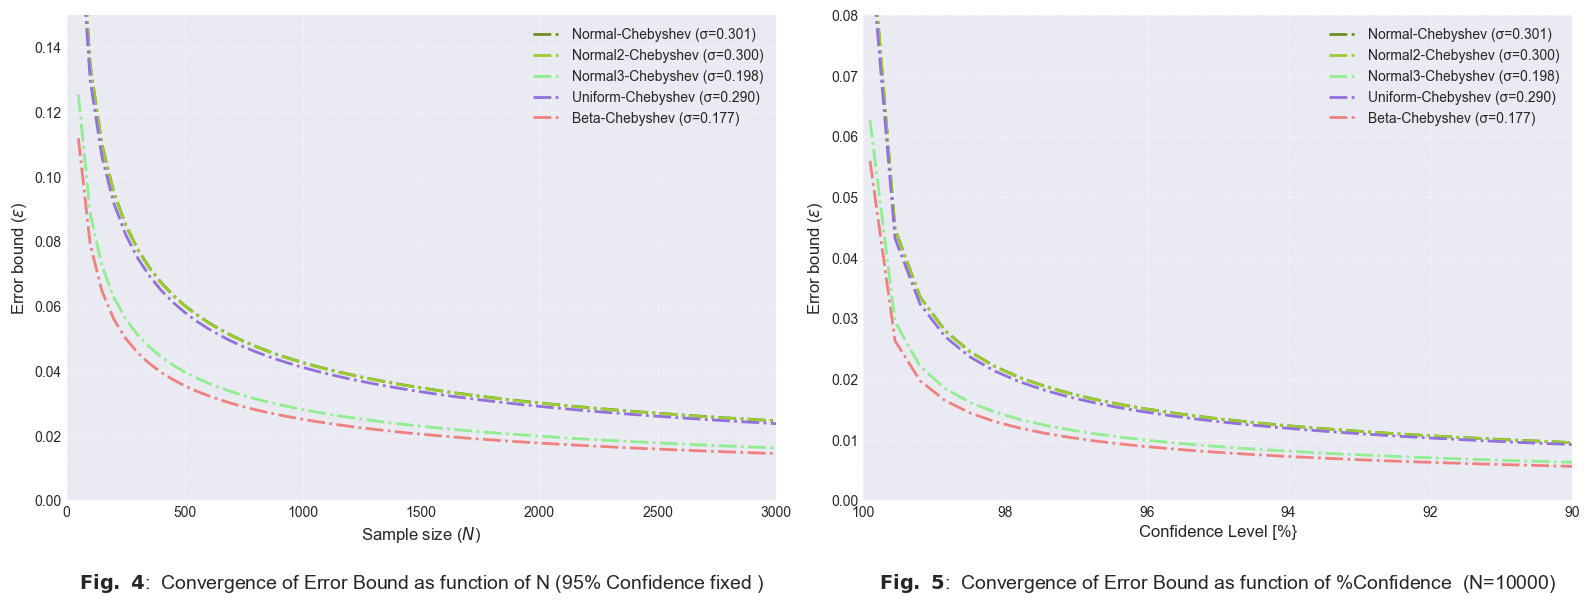

In [39]:
import numpy as np
import matplotlib.pyplot as plt


#General Configuration
plt.style.use('seaborn-v0_8-darkgrid')
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,6))
plt.rcParams['figure.dpi'] = 100

#Variables - left plot
C=0.95
alpha=1-C
N_size=10000
N_values=np.linspace(50,5000,100)

#Variables - Right plot
alpha_size=10000
alpha_values=np.linspace(0.999,0.65,100)


# Distributions dictionary 
np.random.seed(42)
data_dict1={
    'Normal-Chebyshev':np.random.normal(0.5,0.3,N_size),
    'Normal2-Chebyshev':np.random.normal(1,0.3,N_size),
    'Normal3-Chebyshev':np.random.normal(0.5,0.2,N_size),
    'Uniform-Chebyshev':np.random.uniform(0,1,N_size),
    'Beta-Chebyshev':np.random.beta(2,4,N_size)
}



#Color dictionary
color_dict1={
    'Normal-Chebyshev':'olivedrab',
    'Normal2-Chebyshev':'yellowgreen',
    'Normal3-Chebyshev':'lightgreen',
    'Uniform-Chebyshev':'mediumpurple',
    'Beta-Chebyshev':'lightcoral'
}



#Plot convergence

for name,samples in data_dict1.items():
    sigma_emp=np.std(samples) #empiricall estimation of standar deviation (square root of the variance) - Chebishev
   
    #Left plot
    epsilon_c=sigma_emp/np.sqrt(alpha*N_values)
    ax1.plot(N_values,epsilon_c, label=f'{name} (σ={sigma_emp:.3f})',linestyle='-.', linewidth=2, color=color_dict1[name])
    
    #right plot
    epsilon_alpha_c=sigma_emp/np.sqrt((1-alpha_values)*alpha_size)
    ax2.plot((alpha_values*100), epsilon_alpha_c,label=f'{name} (σ={sigma_emp:.3f})',linestyle='-.', linewidth=2, color=color_dict1[name])



#Plot Configuration
#Left
ax1.set_title(r"$\mathbf{Fig.\ 4}$:  Convergence of Error Bound as function of N (95% Confidence fixed )",ha="center", y=-0.2,fontsize=14)
ax1.set_xlabel('Sample size ($N$)', fontsize=12)
ax1.set_ylabel('Error bound ($\epsilon$)', fontsize=12)
ax1.set_xlim(0, 3000)
ax1.set_ylim(0, 0.15)
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.legend()


#Right
ax2.set_title(r"$\mathbf{Fig.\ 5}$:  Convergence of Error Bound as function of %Confidence  (N=10000)",ha="center", y=-0.2,fontsize=14)
ax2.set_xlabel('Confidence Level [%}', fontsize=12)
ax2.set_ylabel('Error bound ($\epsilon$)', fontsize=12)
ax2.set_xlim(100, 90)
ax2.set_ylim(0, 0.08)
ax2.grid(True, linestyle='--', alpha=0.5)
ax2.legend()

plt.subplots_adjust(bottom=0.2, wspace=0.2)
plt.tight_layout()
plt.show()

<div style="width: 90%; margin: 0 auto;">
<p style="text-align: justify;">
For the current section, the behavior of the error bound ($\epsilon$) has been plotted for the five probability distributions analyzed in Section 1, using <b>Chebyshev’s Inequality</b>. <b>Figures 4</b> and <b>5</b> represent $\epsilon$ as a function of the sample size and the confidence level, respectively.
</p>    
<p style="text-align: justify;">     
<b>Figure 4</b> displays the curves generated by keeping the confidence level fixed at 95% ($\alpha=0.05$) while varying the sample size $N$. All curves rapidly decrease in the interval $0 < N < 1500$, and then stabilize as the sample size becomes larger. Distributions with a standard deviation approximately equal to 0.3 (variance $\approx 0.09$) are almost overlapped, even though they correspond to different underlying distributions (e.g., Uniform vs. Normal). Conversely, the Beta distribution and Normal Distribution 3 (Normal3), which have a $\sigma \approx 0.18$, are shifted downwards. This demonstrates that probability distributions with smaller data dispersion (lower $\sigma$) yield smaller error bounds for the same sample size $N$. For example, at $N=500$, the error bound for distributions with $\sigma \approx 0.18$ is about 0.04, whereas for distributions with $\sigma \approx 0.3$, it is approximately 0.06.
</p>                                                                                                                                                   <p style="text-align: justify;">  
In <b>Figure 5</b>, the error bound is presented as a function of the confidence level, keeping the value of $N$ fixed. It is observed that the curve increases asymptotically as the confidence level approaches 100%. Additionally, consistently with the previous figure, distributions with lower variance generate a smaller error bound compared to distributions with higher variance for the same level of confidence.
</p>
<p style="text-align: justify;">  
In conclusion, the comparison demonstrates that <b>Chebyshev’s approach</b> provides information for the error regardless of the type of distribution. Furthermore, a significant improvement in the error bound can be rapidly achieved by increasing the sample size. However, this is true only for a initial increment interval of $N$; once $N$ is sufficiently large, the improvement slows down. Finally, Figure 5 illustrates the cost of certainty which tells that achieving a confidence level close to 100% requires accepting a significantly larger error bound, representing a trade-off between precision ($\epsilon$) and confidence ($1-\alpha$).
</p>
</div>

### 2.2 Hoeffding's inequality


<div style="width: 90%; margin: 0 auto;">
<p style="text-align: justify;">
For a $N$ sample size , with  $X_i$, independent random variables bounded by the intervals $a_i \leq X_i \leq b_i$. The inequality states[1]:

$$
P(|\bar{X} - \mathbb{E}[\bar{X}]| \geq \epsilon) \leq 2e^{-\frac{2N^2\epsilon^2}{\sum_{i=1}^N (a_i - b_i)^2}}
$$
Due to our data points  comes from the same parametrization a,b for Beta distribution, it is possible to expres the sum $(a_i - b_i)^2$ as the value $NR$. Finally, introducing alpha as the maximum error probability ($\alpha=1-CL$) we obtain:  
$$
\alpha = 2e^{-\frac{2n^2\epsilon^2}{NR^2}}
$$
Solving for the error bound $\epsilon$:

$$
\epsilon = R \sqrt{\frac{\ln(2/\alpha)}{2N}}
$$
</p>
</div>

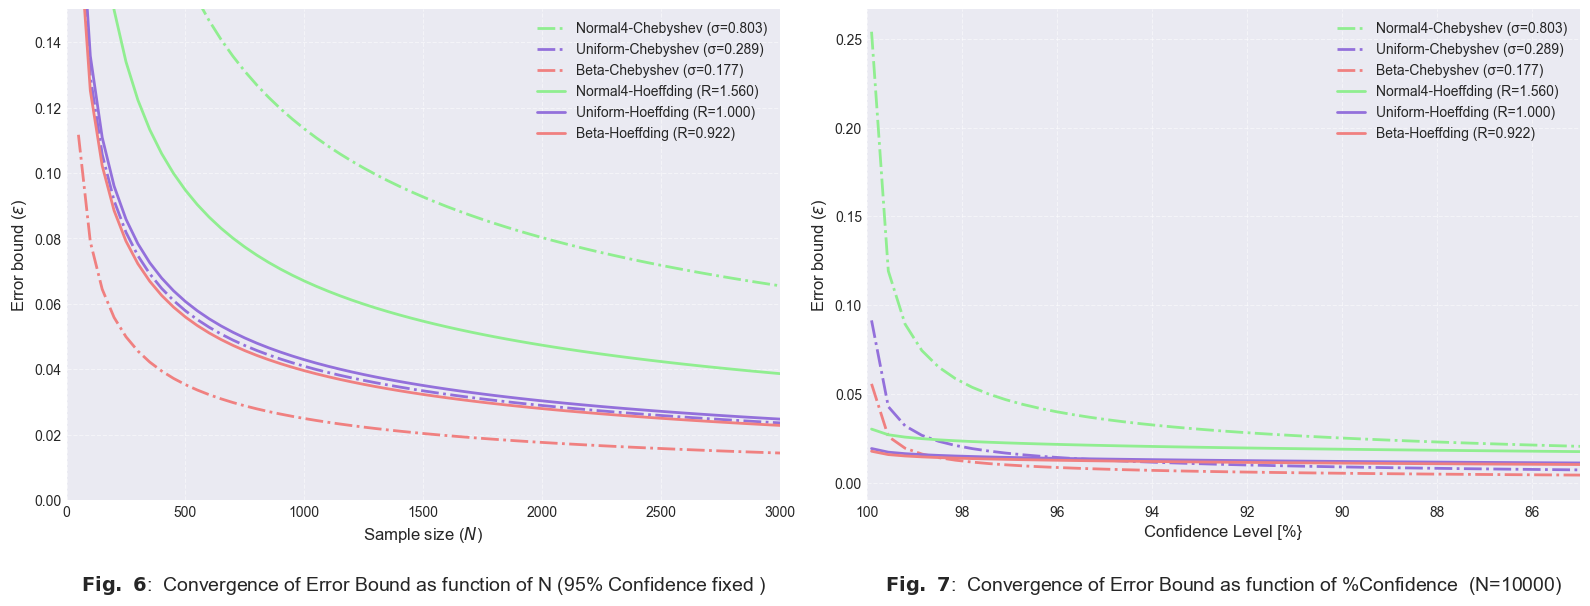

In [118]:
import numpy as np
import matplotlib.pyplot as plt


#General Configuration
plt.style.use('seaborn-v0_8-darkgrid')
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,6))
plt.rcParams['figure.dpi'] = 100

#Variables - left plot
C=0.95
alpha=1-C
N_size=10000
N_values=np.linspace(50,5000,100)

#Variables - Right plot
alpha_size=10000
alpha_values=np.linspace(0.999,0.65,100)


# Distributions dictionary 
np.random.seed(42)
data_dict1={
   # 'Normal-Chebyshev':np.random.normal(0.5,0.3,N_size),
    #'Normal2-Chebyshev':np.random.normal(1,0.3,N_size),
    'Normal4-Chebyshev':np.random.normal(0.5,0.8,N_size),
    'Uniform-Chebyshev':np.random.uniform(0,1,N_size),
    'Beta-Chebyshev':np.random.beta(2,4,N_size)
}

data_dict2={
    'Normal4-Hoeffding':np.random.normal(0.5,0.2,N_size),
    'Uniform-Hoeffding':np.random.uniform(0,1,N_size),
    'Beta-Hoeffding':np.random.beta(2,4,N_size),
    
}

#Color dictionary
color_dict1={
   # 'Normal-Chebyshev':'olivedrab',
    #'Normal2-Chebyshev':'yellowgreen',
    'Normal4-Chebyshev':'lightgreen',
    'Uniform-Chebyshev':'mediumpurple',
    'Beta-Chebyshev':'lightcoral'
}

color_dict2={
    'Normal4-Hoeffding':'lightgreen',
    'Uniform-Hoeffding':'mediumpurple',
    'Beta-Hoeffding':'lightcoral'
}

#Plot convergence

for name,samples in data_dict1.items():
    sigma_emp=np.std(samples) #empiricall estimation of standar deviation (square root of the variance) - Chebishev
   
    #Left plot
    epsilon_c=sigma_emp/np.sqrt(alpha*N_values)
    ax1.plot(N_values,epsilon_c, label=f'{name} (σ={sigma_emp:.3f})',linestyle='-.', linewidth=2, color=color_dict1[name])
    
    #right plot
    epsilon_alpha_c=sigma_emp/np.sqrt((1-alpha_values)*alpha_size)
    ax2.plot((alpha_values*100), epsilon_alpha_c,label=f'{name} (σ={sigma_emp:.3f})',linestyle='-.', linewidth=2, color=color_dict1[name])

for name,samples in data_dict2.items():
    #Left plot
    R=np.max(samples)-np.min(samples) #empiricall estimation of range - Hoeffding
    epsilon_h=R * np.sqrt(np.log(2 / alpha) / (2 * N_values))
    ax1.plot(N_values,epsilon_h, label=f'{name} (R={R:.3f})', linewidth=2, color=color_dict2[name])

      #right plot
    epsilon_h=R * np.sqrt(np.log(2 / (1-alpha_values)) / (2 * alpha_size))
    ax2.plot((alpha_values*100),epsilon_h, label=f'{name} (R={R:.3f})', linewidth=2, color=color_dict2[name])

#Plot Configuration
#Left
ax1.set_title(r"$\mathbf{Fig.\ 6}$:  Convergence of Error Bound as function of N (95% Confidence fixed )",ha="center", y=-0.2,fontsize=14)
ax1.set_xlabel('Sample size ($N$)', fontsize=12)
ax1.set_ylabel('Error bound ($\epsilon$)', fontsize=12)
ax1.set_xlim(0, 3000)
ax1.set_ylim(0, 0.15)
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.legend()


#Right
ax2.set_title(r"$\mathbf{Fig.\ 7}$:  Convergence of Error Bound as function of %Confidence  (N=10000)",ha="center", y=-0.2,fontsize=14)
ax2.set_xlabel('Confidence Level [%}', fontsize=12)
ax2.set_ylabel('Error bound ($\epsilon$)', fontsize=12)
ax2.set_xlim(100, 85)
ax2.grid(True, linestyle='--', alpha=0.5)
ax2.legend()

plt.subplots_adjust(bottom=0.2, wspace=0.2)
plt.tight_layout()
plt.show()

<div style="width: 90%; margin: 0 auto;">
<p style="text-align: justify;">
<b>Figures 6</b> and <b>7</b> display a similar analysis to the one previously conducted, but considering <b>Hoeffding's Inequality</b>. It must be remarked that Hoeffding's formula requires bounded intervals $[a, b]$, making it theoretically unsuitable for <b>unbounded</b> probability distributions like the Normal distribution. However, as a computational exercise, it has been considered the maximum and minimum data points generated by the code as the limits for parameters $a$ and $b$. Additionally, Chebyshev's curves have been included to analyze the differences between both approaches.
</p>

<p style="text-align: justify;">
Regarding the dependence on the sample size ($N$), looking at the left plot (<b>Figure 6</b>), it is possible to observe that the Uniform distribution follows a similar trajectory to the Beta distribution. The reason behind this is that both share a similar range $R \approx 1$ (since both are defined between 0 and 1), and Hoeffding depends primarily on this range. Additionaly, for the examples of Uniform and Beta distributions, both have small values for standard deviation ($\sigma$). Since Chebyshev’s formula Chebyshev takes advantage of low variance ($\sigma$), it outperforms Hoeffding in yielding smaller bounds. Hoeffding's is penalized by the fixed range $R$ regardless of how concentrated the data is.
</p>

<p style="text-align: justify;">
Conversely, if the variance is increased significantly, Hoeffding can show better performance. This is observed in the curve for <b>Normal Distribution 4</b> (Normal4), $\sigma \approx 0.803$). Here, the high variance penalizes Chebyshev, making its error bound larger than Hoeffding's, which relies on R.
</p>

<p style="text-align: justify;">
Finally, the most critical feature is observed in <b>Figure 7</b>. The comparison reveals that the Hoeffding approach consistently delivers a smaller error bound compared to Chebyshev when demanding high confidence. This feature is especially evident in the interval near 100% confidence level. While Chebyshev's bound explodes (due to the $1/\sqrt{\delta}$ term), Hoeffding's bound remains stable (due to the $\sqrt{\ln(1/\delta)}$ term). This proves that it is possible to generate low error bounds with high levels of certainty using Hoeffding, a feature not efficiently achievable with Chebyshev’s approach.
</p>
</div>

## 3. Theoretical values 

<div style="width: 90%; margin: 0 auto;">
<p style="text-align: justify;">
   In order to compute the theoretical value of the distributions analyzed in <b>Section 1</b>, the mathematical expressions in <b>Table 1</b> were used. The formulas were obtained from Casella and Berger [2]. The results are presented in <b>Table 2</b>. It is important to note that, for applying Hoeffding's inequality to the <b>Normal distribution</b> (which is theoretically unbounded), the experimental range $R$ was computed using the maximum and minimum observed data points. Although this approach is not mathematically rigorous, it was included in this analysis solely as a computational exercise, and this is also the reason why only one Normal distribution was selected for comparison.
</p>


<p style="text-align: justify;">
By looking at the outcomes it is noticeable that all empirical error values for the three analyzed distributions are  below the theoretical limits calculated from <b>Chebyshev’s</b> and <b>Hoeffding’s Inequalities</b>.Actually, the empirical error is significantly smaller than these upper bounds. This confirms that the random number generation process was adequate, as the generated samples behave consistently with probabilistic expectations.
</p>
</div>

<br>

<center><strong>Table 1: Theoretical Formulas for Probability Distributions</strong>

| Distribution | Mean ($\mu$) | Variance ($\sigma^2$) | Standard Deviation ($\sigma$) |
| :--- | :---: | :---: | :---: |
| **Normal** $(\mu, \sigma)$ | $\mu$ | $\sigma^2$ | $\sigma$ |
| **Uniform** $(a, b)$ | $\frac{a + b}{2}$ | $\frac{(b - a)^2}{12}$ | $\frac{b - a}{\sqrt{12}}$ |
| **Beta** $(\alpha, \beta)$ | $\frac{\alpha}{\alpha + \beta}$ | $\frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}$ | $\sqrt{\frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}}$ |

In [120]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML

C=0.95
alpha=1-C
N=10000
np.random.seed(42)

nor_mean = 0.5
nor_sigma = 0.3
uni_low = 0
uni_high = 1
beta_alpha = 2
beta_beta = 4

params = {
    'Normal':   {'the_mean':nor_mean, 'sigma': nor_sigma, 'R': None},
    'Uniform':  {'the_mean':(uni_low + uni_high) / 2, 'sigma': (uni_high - uni_low) / np.sqrt(12), 'R': uni_high - uni_low  },
    'Beta':     {'the_mean':beta_alpha / (beta_alpha + beta_beta), 'sigma': np.sqrt((beta_alpha * beta_beta) / (((beta_alpha + beta_beta)**2) * (beta_alpha + beta_beta + 1))), 'R': 1.0} 
}

data = {
    'Normal': np.random.normal(nor_mean, nor_sigma, N),
    'Uniform': np.random.uniform(low=uni_low, high=uni_high, size=N),
    'Beta': np.random.beta(a=beta_alpha, b=beta_beta, size=N)
}

evaluation = []

for name, samples in data.items():
    the_mean = params[name]['the_mean']
    emp_mean = np.mean(samples)
    actual_error = abs(the_mean - emp_mean)
    
    sigma = params[name]['sigma']
    epsilon_cheb = sigma / np.sqrt(alpha * N)
    
    if params[name]['R'] is None:
        R = np.max(samples) - np.min(samples)
        note = "(Empirical R apriximation)"
    else:
        R = params[name]['R']
        note = "(Theoretical R)"
        
    epsilon_hoeff = R * np.sqrt(np.log(2/alpha) / (2*N))
    
    cheb_check = "Pass" if actual_error <= epsilon_cheb else "Fail"
    hoeff_check = "Pass" if actual_error <= epsilon_hoeff else "Fail"

    evaluation.append({
        "Dist": name,
        "Actual\nError": actual_error,
        "Chebyshev\nBound": epsilon_cheb,
        "Cheb.\nCheck": cheb_check,
        "Hoeffding\nBound": epsilon_hoeff,
        "Hoeff.\nCheck": hoeff_check
    })

df_audit = pd.DataFrame(evaluation)

format_dict = {
    "Actual\nError": "{:.5f}",
    "Chebyshev\nBound": "{:.5f}",
    "Hoeffding\nBound": "{:.5f}"
}

styled_audit = df_audit.style.format(format_dict).set_caption("Table 2. Actual Error vs. Theoretical Bounds (N=10,000, 95% Conf)")\
    .set_properties(**{
        'text-align': 'center', 
        'border': '1px solid black !important',
        'white-space': 'pre-wrap'
    }).set_table_styles([
        {'selector': 'table', 'props': [('margin-left', 'auto'), ('margin-right', 'auto')]},
        {'selector': 'th', 'props': [
            ('border', '1px solid black !important'),
            ('text-align', 'center'),
            ('background-color', '#e6e6e6'),
            ('vertical-align', 'middle'),
            ('white-space', 'pre-wrap')
        ]},
        {'selector': 'td', 'props': [('border', '1px solid black !important')]}
    ]).hide(axis="index")

def color_pass_fail(val):
    color = 'green' if 'Pass' in val else 'red'
    return f'color: {color}; font-weight: bold'

styled_audit = styled_audit.map(color_pass_fail, subset=["Cheb.\nCheck", "Hoeff.\nCheck"])

html = styled_audit.to_html()
display(HTML(f'<div style="display: flex; justify-content: center; width: 100%;">{html}</div>'))

Dist,Actual Error,Chebyshev Bound,Cheb. Check,Hoeffding Bound,Hoeff. Check
Normal,0.00064,0.01342,Pass,0.03198,Pass
Uniform,0.00713,0.01291,Pass,0.01358,Pass
Beta,0.00056,0.00797,Pass,0.01358,Pass


## 4.  Empirical Rule: 68-95-99

<div style="width: 90%; margin: 0 auto;">
<p style="text-align: justify;">
According to Runger and Montgomery [3], the rule of 68.3–95.4–99.7 derives from a useful result concerning the Normal distribution. These values are derived from the relationship between the level of confidence and the standard deviation, as shown in the following expressions:
    </p>
</div>

$$
\begin{align}
P(\mu - \sigma < X < \mu + \sigma) &= 0.6827 \\
P(\mu - 2\sigma < X < \mu + 2\sigma) &= 0.9545 \\
P(\mu - 3\sigma < X < \mu + 3\sigma) &= 0.9973
\end{align}
$$

<div style="width: 90%; margin: 0 auto;">
<p style="text-align: justify;">
To answer the question of for which distributions, among the Beta, Uniform, and Normal, the <strong>68.3–95.4–99.7 Rule</strong> (Empirical Rule) holds, the number of simulated data points that fell within the intervals corresponding to 1, 2, and 3 standard deviations ($\sigma$) was counted. This methodology allowed a direct comparison between the observed behavior of the samples and the theoretical expectations of the rule. However, it was necessary to define a <b>tolerance threshold ($T$)</b> to accept or reject the similarity. By analyzing Table 2, the maximum error bound corresponds to <b>Hoeffding’s approach</b> with a value approximately equal to 1.4% for distributions different from the Normal. Consequently, a conservative tolerance of <b>$T=1.4\%$</b> was established.
</p>

<p style="text-align: justify;">
Based on this acceptance criterion, <b>Table 3</b> was constructed. The results demonstrate that only the Normal distributions strictly follow the rule, which was according to the definition. In contrast, the Uniform and Beta distributions fail to meet the target percentages, confirming that the Empirical Rule is a specific property of Gaussian distributions and not a universal law for all probability distributions.
</p>
</div>

In [141]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML

#General parameters
np.random.seed(42)
C=0.95
alpha=1-C
N=10000

#Rule Target
t_1std=68.3
t_2std=95.4
t_3std=99.7
T=1.4

#Distribution parameters
nor_mean = 0.5
nor_sigma = 0.3
uni_low = 0
uni_high = 1
beta_alpha = 2
beta_beta = 4

#Distribution datapoints generation
data = {
    'Normal': np.random.normal(nor_mean, nor_sigma, N),
    'Uniform': np.random.uniform(uni_low, uni_high, N),
    'Beta': np.random.beta(beta_alpha, beta_beta, N)
}

evaluation = []

#Sum
for name,samples in data.items():
    mean=np.mean(samples)
    sigma=np.std(samples)
    
    c_1std=np.sum((samples >= mean - sigma) & (samples <= mean + sigma))
    c_2std=np.sum((samples >= mean - 2*sigma) & (samples <= mean + 2*sigma))
    c_3std=np.sum((samples >= mean - 3*sigma) & (samples <= mean + 3*sigma))
    
    p_1std=(c_1std/N)*100
    p_2std=(c_2std/N)*100
    p_3std=(c_3std/N)*100
    
    #Evaluation
    # Todo este bloque debe estar indentado dentro del for
    is_normal = (abs(p_1std - t_1std) < T) and \
                (abs(p_2std - t_2std) < T) and \
                (abs(p_3std - t_3std) < T)
    
    verdict = "YES" if is_normal else "NO"

    evaluation.append({
        "Distribution": name,
        "1σ Interval\n(~68.3%)": p_1std,
        "2σ Interval\n(~95.4%)": p_2std,
        "3σ Interval\n(~99.7%)": p_3std,
        "Holds\nRule?": verdict
    })

#Print

df_rule=pd.DataFrame(evaluation)

format_dict = {
    "1σ Interval\n(~68.3%)": "{:.2f}%",
    "2σ Interval\n(~95.4%)": "{:.2f}%",
    "3σ Interval\n(~99.7%)": "{:.2f}%"
}

def color_evaluation(val):
    color = 'green' if 'YES' in val else 'red'
    return f'color: {color}; font-weight: bold'

styled_rule = df_rule.style.format(format_dict)\
    .set_caption(f"Table 3: Verification of the Empirical Rule (68-95-99)")\
    .set_properties(**{
        'text-align': 'center', 
        'border': '1px solid black !important',
        'white-space': 'pre-wrap'
    }).set_table_styles([
        {'selector': 'caption', 'props': [('font-size', '14px'), ('font-weight', 'bold'), ('color', 'black')]},
        {'selector': 'th', 'props': [('border', '1px solid black !important'), ('text-align', 'center'), ('background-color', '#e6e6e6'), ('white-space', 'pre-wrap')]},
        {'selector': 'td', 'props': [('border', '1px solid black !important')]}
    ]).hide(axis="index").map(color_evaluation, subset=["Holds\nRule?"])

# 6. Centrado HTML
html_rule = styled_rule.to_html()
display(HTML(f'<div style="display: flex; justify-content: center; width: 100%;">{html_rule}</div>'))


Distribution,1σ Interval (~68.3%),2σ Interval (~95.4%),3σ Interval (~99.7%),Holds Rule?
Normal,68.38%,95.38%,99.73%,YES
Uniform,57.91%,100.00%,100.00%,NO
Beta,65.31%,96.63%,99.89%,NO


## 5.  Conclusions

<div style="width: 90%; margin: 0 auto;">
 <ul style="text-align: justify;">
        <li>
            Different random samples to simulate probability distributions were generated by the use of the library NumPy and the function random.
        </li>
        <li>
            Graphical comparison of Beta, Normal, and Uniform distributions revealed their characteristics, showing that the most versatile one, as a result of its capacity to generate symmetric, asymmetric, or uniform distributions, was the Beta distribution.
        </li>
        <li>
            Comparison between two different methods for confidence intervals, Chebyshev and Hoeffding, showed that Chebyshev is useful when the sample size has small data dispersion; however, Hoeffding allows achieving smaller errors with larger confidence levels.
        </li>
        <li>
            The theoretical/empirical analysis demonstrates that the random data points generated by using the library NumPy are an excelent approximation that follows the mathematical expectations.
        </li>
        <li>
            The analysis of the rule 68-95-99 showed that this framework is not a general law for all types of probability distributions, and confirmed its validity in the case of Normal distributions.
        </li>
    </ul>
</div>

## 6. Bibliografy
<li> [1] D. Tal , Technion EE 046202 - Unsupervised Learning and Data Analysis [Jupyter Notebook]. Available: https://github.com/taldatech/ee046202-unsupervised-learning-data-analysis/blob/master/README.md       </li>
<li>[2] G. Casella and R. L. Berger, Statistical Inference, 2nd ed. Pacific Grove, CA: Duxbury, 2002.      </li>
<li>[3] D. C. Montgomery and G. C. Runger, Applied Statistics and Probability for Engineers, 6th ed. New York, NY: John Wiley & Sons, 2014.</li>
